In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from fastai.vision.all import *

In [2]:
path = Path('../input/h-and-m-personalized-fashion-recommendations')
ar_df = pd.read_csv(path/'articles.csv')

In [3]:
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

For at dette skal fungere må vi legge til tilhørende bilde for hver artikkel. Dette kan vi gjøre ved å lagre mappestien til bildet i en ny kollonne for tilhørende produkt

In [4]:
ar_df['img_path'] = ""

In [5]:
BASE = '../input/h-and-m-personalized-fashion-recommendations/images/'

for i in ar_df.index:
    a = ar_df.at[i, 'article_id']
    ar_df.at[i,"img_path"] = BASE+'0'+str(a)[:2]+'/0'+str(a)+'.jpg'

In [6]:
# Ser om det er lagt til korrekt
ar_df.iloc[3000]['img_path']

'../input/h-and-m-personalized-fashion-recommendations/images/044/0443860043.jpg'

In [7]:
os.path.exists('../input/h-and-m-personalized-fashion-recommendations/images/010/0108775015.jpg')

True

In [8]:
os.path.exists('../input/h-and-m-personalized-fashion-recommendations/images/053/0539724003.jpg')

False

In [9]:
ar_df.iloc[10305]['img_path']

'../input/h-and-m-personalized-fashion-recommendations/images/053/0539724003.jpg'

Ser at det er noen produkter som ikke har tilhørende bilde. Disse kan fjernes fra datasettet. 

In [10]:
dar_df = ar_df.copy()
c = 0
for i in ar_df.index:
    if not os.path.exists(ar_df.at[i,"img_path"]):
        c = c + 1 #Teller hvor mange produkter som blir fjernet
        dar_df = dar_df.drop(i)
        
print(c)

442


In [11]:
dar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105100 entries, 0 to 105541
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105100 non-null  int64 
 1   product_code                  105100 non-null  int64 
 2   prod_name                     105100 non-null  object
 3   product_type_no               105100 non-null  int64 
 4   product_type_name             105100 non-null  object
 5   product_group_name            105100 non-null  object
 6   graphical_appearance_no       105100 non-null  int64 
 7   graphical_appearance_name     105100 non-null  object
 8   colour_group_code             105100 non-null  int64 
 9   colour_group_name             105100 non-null  object
 10  perceived_colour_value_id     105100 non-null  int64 
 11  perceived_colour_value_name   105100 non-null  object
 12  perceived_colour_master_id    105100 non-null  int64 
 13  perc

In [12]:
ar_df.product_type_name.value_counts()

product_type_name
Trousers         11169
Dress            10362
Sweater           9302
T-shirt           7904
Top               4155
                 ...  
Towel                1
Cushion              1
Headband             1
Keychain             1
Clothing mist        1
Name: count, Length: 131, dtype: int64

In [13]:
uh = dar_df['product_type_name'].value_counts() < 20
#uh.index.values
uh.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [14]:
# Ser hva de ulike kategoriene som inneholder mindre en 20 produkter er og fjerner disse produktene fra datasettet.
for i in range(131):
    if uh.values[i] == True:
        print(uh.index.values[i], uh.values[i])
        dar_df = dar_df.drop(dar_df[dar_df['product_type_name'] == uh.index.values[i]].index)

Underdress True
Nipple covers True
Giftbox True
Side table True
Cap True
Earrings True
Flat shoes True
Felt hat True
Weekend/Gym bag True
Underwear corset True
Leg warmers True
Dog wear True
Accessories set True
Bucket hat True
Straw hat True
Alice band True
Sleep Bag True
Backpack True
Marker pen True
Cross-body bag True
Mobile case True
Moccasins True
Chem. cosmetics True
Baby Bib True
Braces True
Zipper head True
Eyeglasses True
Toy True
Shoulder bag True
Stain remover spray True
Wireless earphone case True
Hairband True
Tote bag True
Sewing kit True
Washing bag True
Pre-walkers True
Bumbag True
Blanket True
Bra extender True
Wood balls True
Towel True
Cushion True
Headband True
Keychain True
Clothing mist True


In [15]:
# Sjekker hvor mange ulike kategorier som gjennstår.
dar_df['product_type_name'].value_counts() < 20

product_type_name
Trousers       False
Dress          False
Sweater        False
T-shirt        False
Top            False
               ...  
Umbrella       False
Hair ties      False
Waterbottle    False
Heels          False
Dog Wear       False
Name: count, Length: 86, dtype: bool

Ferdig med å lage til datasettet og kan nå begjynne å lage modellen

In [16]:
sz=224
item_tfms = Resize(sz)
batch_tfms = None
bs=64

In [17]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                   get_x=ColReader('img_path'), 
                   get_y=ColReader('product_type_name'),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42), 
                   item_tfms=item_tfms, 
                   batch_tfms=batch_tfms)

In [18]:
dls = dblock.dataloaders(dar_df, path=path, bs=bs)

In [19]:
#dblock.show_batch()
#[Errno 2] No such file or directory: '../input/h-and-m-personalized-fashion-recommendations/images/053/0539724003.jpg'
# Ellers ikke mulig å gjøre dette fordi bildene starter med 0, som ikke er lov i Python.

In [20]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 84.4MB/s]


In [21]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.400177,1.070919,0.695609,23:03


epoch,train_loss,valid_loss,accuracy,time
0,0.822098,0.678869,0.801697,23:17


In [22]:
interp = ClassificationInterpretation.from_learner(learn)

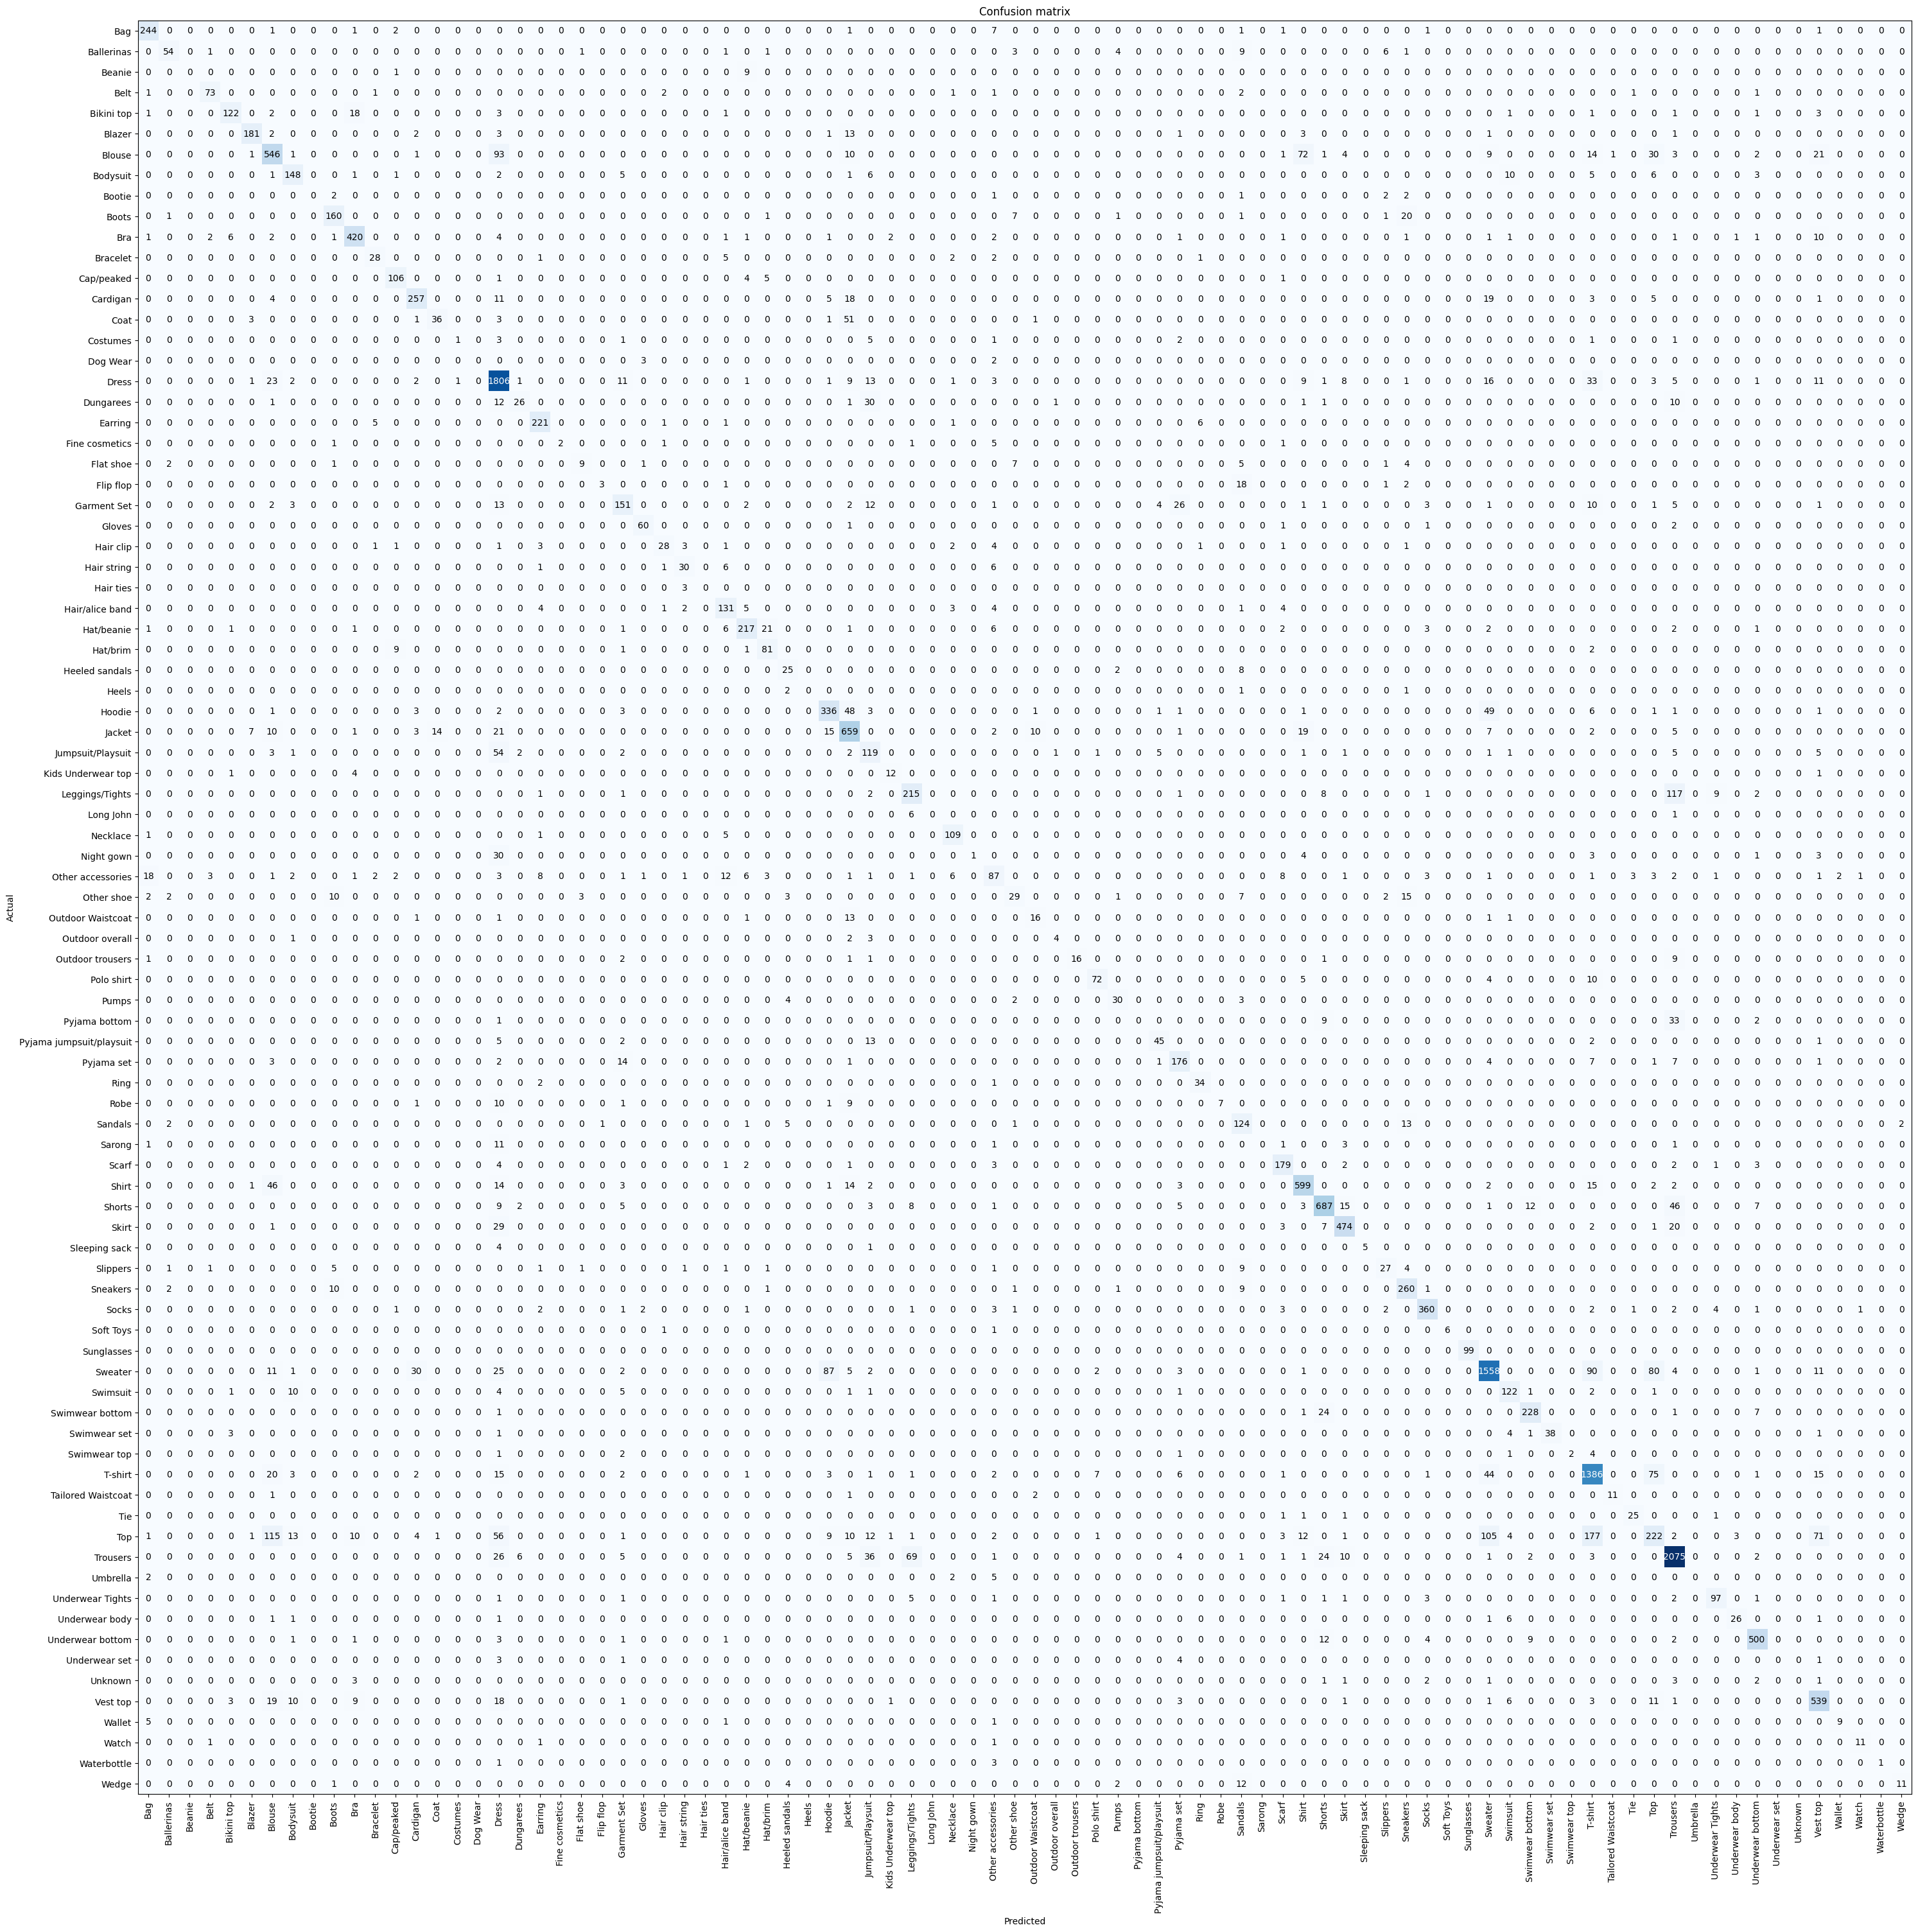

In [23]:
interp.plot_confusion_matrix(figsize=(30,30))

In [24]:
interp.most_confused()

[('Top', 'T-shirt', 177),
 ('Leggings/Tights', 'Trousers', 117),
 ('Top', 'Blouse', 115),
 ('Top', 'Sweater', 105),
 ('Blouse', 'Dress', 93),
 ('Sweater', 'T-shirt', 90),
 ('Sweater', 'Hoodie', 87),
 ('Sweater', 'Top', 80),
 ('T-shirt', 'Top', 75),
 ('Blouse', 'Shirt', 72),
 ('Top', 'Vest top', 71),
 ('Trousers', 'Leggings/Tights', 69),
 ('Top', 'Dress', 56),
 ('Jumpsuit/Playsuit', 'Dress', 54),
 ('Coat', 'Jacket', 51),
 ('Hoodie', 'Sweater', 49),
 ('Hoodie', 'Jacket', 48),
 ('Shirt', 'Blouse', 46),
 ('Shorts', 'Trousers', 46),
 ('T-shirt', 'Sweater', 44),
 ('Trousers', 'Jumpsuit/Playsuit', 36),
 ('Dress', 'T-shirt', 33),
 ('Pyjama bottom', 'Trousers', 33),
 ('Blouse', 'Top', 30),
 ('Dungarees', 'Jumpsuit/Playsuit', 30),
 ('Night gown', 'Dress', 30),
 ('Sweater', 'Cardigan', 30),
 ('Skirt', 'Dress', 29),
 ('Garment Set', 'Pyjama set', 26),
 ('Trousers', 'Dress', 26),
 ('Sweater', 'Dress', 25),
 ('Swimwear bottom', 'Shorts', 24),
 ('Trousers', 'Shorts', 24),
 ('Dress', 'Blouse', 23),
 (